In [5]:
import nbsetup
import numpy as np
import seaborn as sns
import pandas as pd
import ensemblepy as ep
import scipy as sp
import matplotlib.pyplot as plt
import time

In [6]:
STEPS = 1000
DIMENSIONS = 4

from ensemblepy.densityvar import generate_cache
vs = generate_cache(steps=STEPS, dimensions=DIMENSIONS, timings=True)
print(vs)

1 1.0779180526733398
2 19.278305053710938
3 153.49192714691162
4 2011.0829808712006
{(10, (-0.5, 1.5), 1000, 1): (0.007015533319194387, 0.04004137204922686), (10, (-0.5, 1.5), 1000, 2): (0.0004035551380986547, 0.003577363611197297), (10, (-0.5, 1.5), 1000, 3): (2.6613803837286574e-05, 0.0003468042837488775), (10, (-0.5, 1.5), 1000, 4): (2.0991978653663497e-06, 3.86402719595493e-05)}


In [7]:
def disent(dist, b, x, d=1, bins=None):
    if bins is None: bins = [np.linspace(0,1,b+1),]
    pmf = np.histogramdd(dist, bins=bins)[0].flatten()
    ent = sp.stats.entropy(pmf)
    maxe = np.log(len(pmf))
    return {'x': x,
            'bins': b,
            'dimension': d,
            'entropy': ent,
            'ent/maxent': ent/maxe,
            'LDDP': maxe-ent
           }

In [8]:
def compare(title, func, dimensions=range(1,DIMENSIONS+1), percent=np.linspace(0,1,11), binrange=(2,3,5,10,20,30)):
    tic = time.time()
    data = []
    discrete = []
    for x in percent:
        for d in dimensions:
            dist = np.array([func(x) for _ in range(d)]).T
            data.append({
                'x': x,
                'y': ep.density_variance(dist, steps=STEPS, vs=vs),
                'dimension': d,
            })
            for k in binrange:
                bins = np.array([np.linspace(0,1, k+1) for _ in range(d)])
                discrete.append(disent(dist, k, x, d, bins))
            nbsetup.cp(title, 'd =', d, 'x =', x, 'time =', time.time()-tic)
    return pd.DataFrame(data), pd.DataFrame(discrete)

In [9]:
def plot_dv(title, func, data, discrete, save=True):
    dimensions = data['dimension'].unique()
    fig, axes = plt.subplots(1,len(dimensions)+1, figsize=(15,4))
    
    g = sns.lineplot(data=data, x='x', y='y', hue='dimension', ax=axes[0],
        palette=sns.dark_palette("#69d", reverse=True, as_cmap=True)).set(xlim=(-0.1, 1.1), ylim=(-0.1, 1.1),
          xlabel='Distribution variable x', title='Density variance', ylabel=None)
    
    for i, d in enumerate(dimensions):
        df = data[data['dimension']==d]
        sns.lineplot(data=discrete[discrete['dimension'] == d], x='x',
            y='ent/maxent', hue='bins', ax=axes[i+1]).set(title='%s Dimension' % d,
                xlim=(-0.1, 1.1), ylim=(-0.1, 1.1), ylabel=None)
        sns.lineplot(x=df['x'], y=df['y'], ax=axes[i+1],
                     color='deepskyblue', linestyle='dashed').set(ylabel=None, xlabel='Distribution variable x')
    if save:
        fig.savefig('%s-dv.eps' % title)


def plot_comparison(title, func, total=3, binrange=range(2,30), save=True):
    fig, axes = plt.subplots(2, total, figsize=(15,8))

    maxd = None
    for i in range(total):
        # hists
        x = i/(total-1)
        dist = func(x)
        sns.histplot(dist, bins=11, binrange=(0,1), ax=axes[0][i], color='lightgrey'
                ).set(title="1D distribution for x=%.1f" % x, ylabel=None)
        dens, steps = ep.densities(dist, steps=100)
        if maxd is None: maxd = dens.max()
        sns.lineplot(x=steps.T[0], y=dens, color='deepskyblue',
                     linestyle='dashed', ax=axes[0][i].twinx()).set(
                        ylabel=None, yticks=[], ylim=(0, maxd*1.1))
        
        # comparisons
        df = pd.DataFrame([disent(dist, b, x) for b in binrange])
        sns.lineplot(data=df.melt(id_vars=('x','bins','dimension')),
                     x='bins', y='value', hue='variable', ax=axes[1][i], palette=sns.color_palette("Set2", 3))
        dv = ep.density_variance(dist)
        sns.lineplot(x=[binrange[0], binrange[-1]], y=[dv,dv],
                     ax=axes[1][i], color='deepskyblue', linestyle='dashed',
                     label='dens.var.').set(ylabel=None, xlabel='Number of bins')
        
    if save:
        fig.savefig('%s-compare.eps' % title)

        

In [10]:
COUNT = 5000
PLOTS = {
    'perfect': lambda p: np.concatenate([np.random.uniform(0, 1, int(COUNT*p)), np.ones(int(COUNT*(1-p)))*0.5]),
    'points': lambda p: np.concatenate([np.ones(COUNT)*(0.5+p/2),np.ones(COUNT)*(0.5-p/2)]),
    'block': lambda p: np.random.uniform(0, p, COUNT),
    #'flat': lambda p: np.ones(COUNT)*p,
}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


block d = 4 x = 1.0 time = 213.8454930782318


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


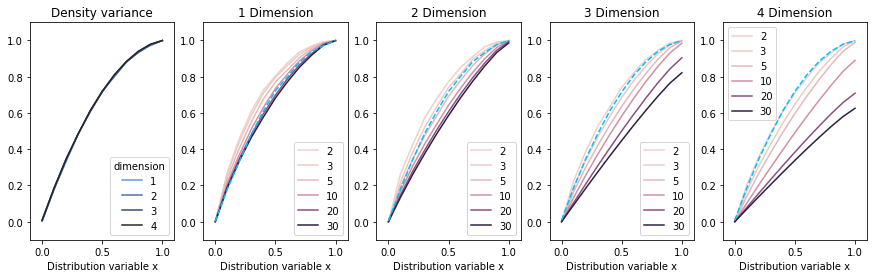

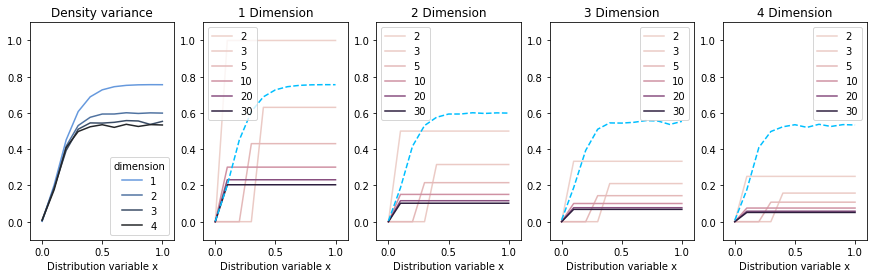

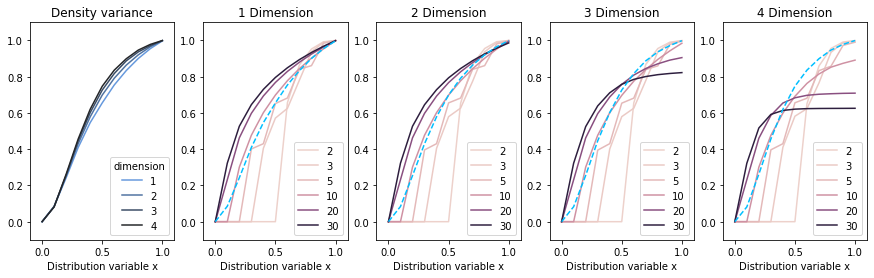

In [11]:
for item in PLOTS.items():
    plot_dv(*item, *compare(*item))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


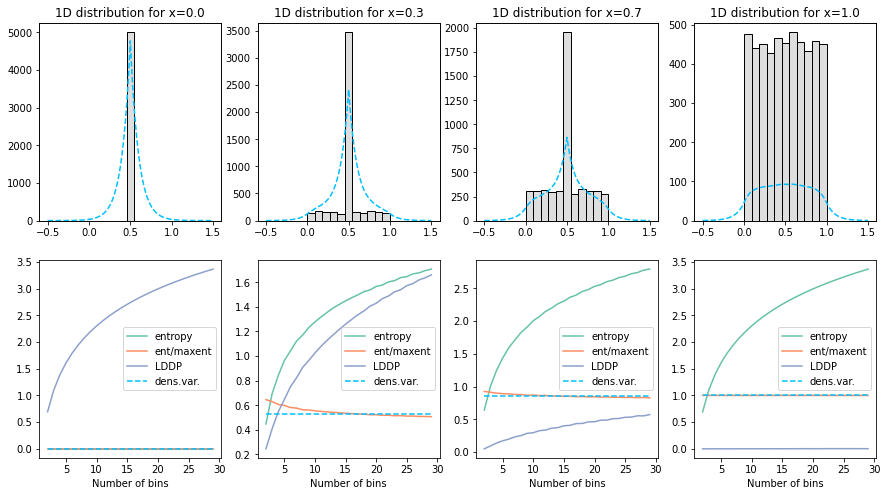

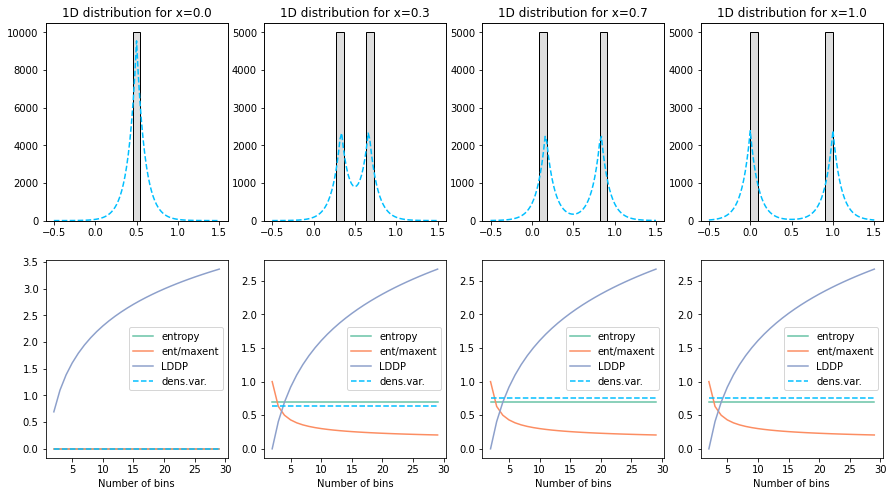

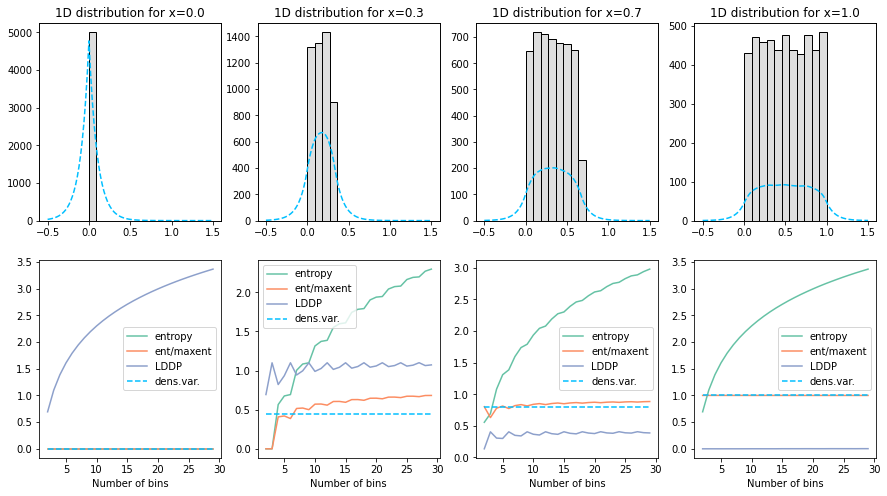

In [12]:
for item in PLOTS.items():
    plot_comparison(*item, 4)